In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np



In [6]:
import pandas as pd

# Read the CSV files
df0 = pd.read_csv('./DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_0.csv', parse_dates=['DateRepConf'])
df1 = pd.read_csv('./DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_1.csv', parse_dates=['DateRepConf'])
df2 = pd.read_csv('./DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_2.csv', parse_dates=['DateRepConf'])
df3 = pd.read_csv('./DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_3.csv', parse_dates=['DateRepConf'])

# Concatenate all dataframes
merged_df = pd.concat([df0, df1, df2, df3], ignore_index=True)

# Convert date to numeric (days since the first date)
merged_df['DateRepConf'] = pd.to_datetime(merged_df['DateRepConf'])
merged_df['days'] = (merged_df['DateRepConf'] - merged_df['DateRepConf'].min()).dt.days

# Sort the merged dataframe by DateRepConf
merged_df = merged_df.sort_values('DateRepConf').reset_index(drop=True)

# Save the merged dataframe to a single pickle file
merged_df.to_pickle('DOH_COVID_Data_Drop_20240103_2020-2023_Merged.pkl')

# Print information about the merged dataset
print("Merged Dataset Information:")
print(merged_df.info())

print("\nMerged Dataset Description:")
print(merged_df.describe())

print(f"\nTotal number of rows in merged dataset: {len(merged_df)}")
print(f"Date range: from {merged_df['DateRepConf'].min()} to {merged_df['DateRepConf'].max()}")

C:\Users\Cheska\AppData\Local\Temp\ipykernel_28424\3124055933.py:4: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('./DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_0.csv', parse_dates=['DateRepConf'])


Merged Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CaseCode           object        
 1   Age                float64       
 2   AgeGroup           object        
 3   Sex                object        
 4   DateSpecimen       object        
 5   DateResultRelease  object        
 6   DateRepConf        datetime64[ns]
 7   DateDied           object        
 8   DateRecover        object        
 9   RemovalType        object        
 10  DateRepRem         object        
 11  Admitted           object        
 12  RegionRes          object        
 13  ProvRes            object        
 14  CityMunRes         object        
 15  CityMuniPSGC       object        
 16  BarangayRes        object        
 17  BarangayPSGC       object        
 18  HealthStatus       object        
 19  Quarantined        object        
 

In [12]:

# Read the merged pickle file
merged_df = pd.read_pickle('DOH_COVID_Data_Drop_20240103_2020-2023_Merged.pkl')

# Filter for NCR region
ncr_df = merged_df[merged_df['RegionRes'] == 'NCR']
# Convert DateRepConf to MM-DD-YYYY format
ncr_df['DateRepConf'] = pd.to_datetime(ncr_df['DateRepConf']).dt.strftime('%m-%d-%Y')

# Create a new DataFrame with only DateRepConf and RegionRes columns
ncr_date_region_df = ncr_df[['DateRepConf', 'RegionRes']]

ncr_date_region_df.to_pickle('DOH_COVID_Data_NCR_DateRegion_Filtered.pkl')
# Print information about the new dataset
print("NCR Date-Region Dataset Information:")
print(ncr_date_region_df.info())

print("\nNCR Date-Region Dataset Description:")
print(ncr_date_region_df.describe())

print(f"\nTotal number of rows in NCR Date-Region dataset: {len(ncr_date_region_df)}")
print(f"Date range: from {ncr_date_region_df['DateRepConf'].min()} to {ncr_date_region_df['DateRepConf'].max()}")

# Display the first few rows of the new dataset
print("\nFirst few rows of the NCR Date-Region dataset:")
print(ncr_date_region_df.head())

# Display the last few rows of the new dataset
print("\nLast few rows of the NCR Date-Region dataset:")
print(ncr_date_region_df.tail())






C:\Users\Cheska\AppData\Local\Temp\ipykernel_28424\1851491859.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncr_df['DateRepConf'] = pd.to_datetime(ncr_df['DateRepConf']).dt.strftime('%m-%d-%Y')


NCR Date-Region Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1279546 entries, 6 to 3999997
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   DateRepConf  1279546 non-null  object
 1   RegionRes    1279546 non-null  object
dtypes: object(2)
memory usage: 29.3+ MB
None

NCR Date-Region Dataset Description:
       DateRepConf RegionRes
count      1279546   1279546
unique        1040         1
top     01-10-2022       NCR
freq         18426   1279546

Total number of rows in NCR Date-Region dataset: 1279546
Date range: from 01-01-2021 to 12-31-2022

First few rows of the NCR Date-Region dataset:
   DateRepConf RegionRes
6   03-08-2020       NCR
8   03-08-2020       NCR
10  03-09-2020       NCR
11  03-09-2020       NCR
12  03-09-2020       NCR

Last few rows of the NCR Date-Region dataset:
        DateRepConf RegionRes
3999991  01-11-2023       NCR
3999993  01-11-2023       NCR
3999994  01-11-2023 

In [13]:

# Read the pickle file
date_filtered = pd.read_pickle('DOH_COVID_Data_NCR_DateRegion_Filtered.pkl')

# Convert DateRepConf back to datetime for filtering
date_filtered['DateRepConf'] = pd.to_datetime(date_filtered['DateRepConf'])

# Filter for the specified date range
start_date = '2020-04-16'
end_date = '2021-03-16'
date_filtered = date_filtered[(date_filtered['DateRepConf'] >= start_date) & (date_filtered['DateRepConf'] <= end_date)]

# Convert DateRepConf back to MM-DD-YYYY format
date_filtered['DateRepConf'] = date_filtered['DateRepConf'].dt.strftime('%m-%d-%Y')

# Save the filtered DataFrame to a new pickle file
date_filtered.to_pickle('DOH_COVID_Data_NCR_DateRegion_Filtered_Apr2020_Mar2021.pkl')

# Print information about the filtered dataset
print("Filtered NCR Date-Region Dataset Information:")
print(date_filtered.info())

print("\nFiltered NCR Date-Region Dataset Description:")
print(date_filtered.describe())

print(f"\nTotal number of rows in filtered dataset: {len(date_filtered)}")
print(f"Date range: from {date_filtered['DateRepConf'].min()} to {date_filtered['DateRepConf'].max()}")

# Display the first few rows of the filtered dataset
print("\nFirst few rows of the filtered dataset:")
print(date_filtered.head())

# Display the last few rows of the filtered dataset
print("\nLast few rows of the filtered dataset:")
print(date_filtered.tail())

Filtered NCR Date-Region Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 247221 entries, 5107 to 610069
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   DateRepConf  247221 non-null  object
 1   RegionRes    247221 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB
None

Filtered NCR Date-Region Dataset Description:
       DateRepConf RegionRes
count       247221    247221
unique         335         1
top     08-10-2020       NCR
freq          3993    247221

Total number of rows in filtered dataset: 247221
Date range: from 01-01-2021 to 12-31-2020

First few rows of the filtered dataset:
     DateRepConf RegionRes
5107  04-16-2020       NCR
5109  04-16-2020       NCR
5111  04-16-2020       NCR
5112  04-16-2020       NCR
5113  04-16-2020       NCR

Last few rows of the filtered dataset:
       DateRepConf RegionRes
610061  03-16-2021       NCR
610063  03-16-2021       NCR
610067  03-16-2021 

In [15]:
# Read the pickle file
date_filtered = pd.read_pickle('DOH_COVID_Data_NCR_DateRegion_Filtered_Apr2020_Mar2021.pkl')

# Create a new dataset with date counts
date_counts = date_filtered['DateRepConf'].value_counts().reset_index()
date_counts.columns = ['DateRepConf', 'Count']

# Sort the dataset by date
date_counts = date_counts.sort_values('DateRepConf')

# Reset the index
date_counts = date_counts.reset_index(drop=True)

# Save the new dataset to a pickle file
date_counts.to_pickle('DOH_COVID_Data_NCR_DateCounts_Apr2020_Mar2021.pkl')

# Print information about the new dataset
print("NCR Date Counts Dataset Information:")
print(date_counts.info())

print("\nNCR Date Counts Dataset Description:")
print(date_counts.describe())

print(f"\nTotal number of unique dates: {len(date_counts)}")
print(f"Date range: from {date_counts['DateRepConf'].min()} to {date_counts['DateRepConf'].max()}")

# Display the first few rows of the new dataset
print("\nFirst few rows of the Date Counts dataset:")
print(date_counts.head())

# Display the last few rows of the new dataset
print("\nLast few rows of the Date Counts dataset:")
print(date_counts.tail())

# Optional: Display some statistics about the counts
print("\nCount statistics:")
print(f"Minimum daily count: {date_counts['Count'].min()}")
print(f"Maximum daily count: {date_counts['Count'].max()}")
print(f"Average daily count: {date_counts['Count'].mean():.2f}")
print(f"Median daily count: {date_counts['Count'].median()}")

NCR Date Counts Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DateRepConf  335 non-null    object
 1   Count        335 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None

NCR Date Counts Dataset Description:
             Count
count   335.000000
mean    737.973134
std     705.303206
min      45.000000
25%     280.500000
50%     456.000000
75%    1001.000000
max    3993.000000

Total number of unique dates: 335
Date range: from 01-01-2021 to 12-31-2020

First few rows of the Date Counts dataset:
  DateRepConf  Count
0  01-01-2021    377
1  01-02-2021    151
2  01-03-2021    191
3  01-04-2021    263
4  01-05-2021    160

Last few rows of the Date Counts dataset:
    DateRepConf  Count
330  12-27-2020    215
331  12-28-2020    181
332  12-29-2020    203
333  12-30-2020    289
334  12-31-2020    533

Co

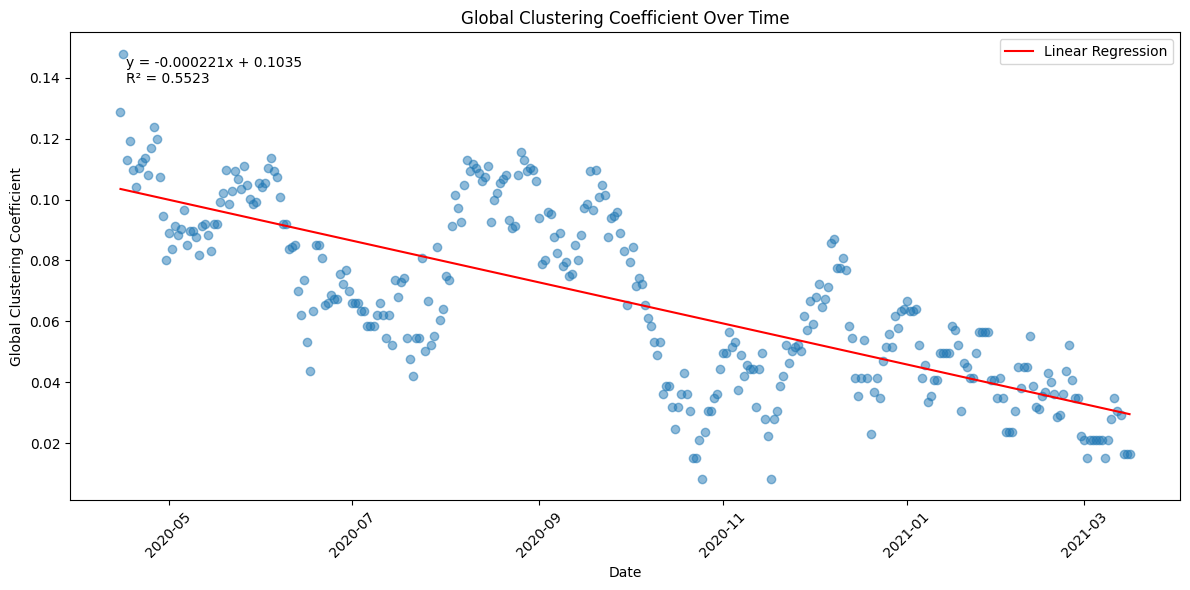

In [5]:
# Read the CSV file
df = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.4.csv', parse_dates=['date'])

# Convert date to numeric (days since the first date)
df['date'] = pd.to_datetime(df['date'])
df['days'] = (df['date'] - df['date'].min()).dt.days

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['days'], df['global_cc'])

# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['global_cc'], alpha=0.5)
plt.plot(df['date'], intercept + slope * df['days'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Global Clustering Coefficient Over Time')
plt.xlabel('Date')
plt.ylabel('Global Clustering Coefficient')
plt.legend()

# Add text with regression details
text = f'y = {slope:.6f}x + {intercept:.4f}\nR² = {r_value**2:.4f}'
plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, verticalalignment='top')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()


    
plt.savefig("../../graphs/global_cc_regression_MSV_0.6.png", bbox_inches='tight')
plt.savefig("../../graphs/global_cc_regression_MSV_0.6.pdf", bbox_inches='tight')

plt.show()

# Print additional statistics



Merged data saved to 'merged_netstats_covid_data.csv'


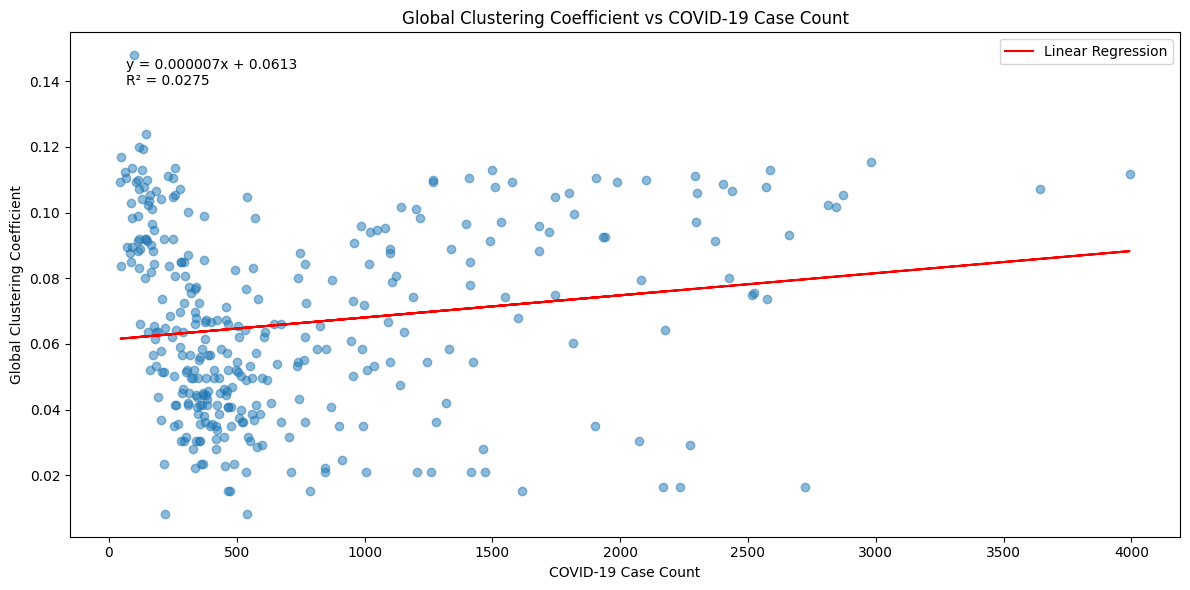


Merged Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       335 non-null    datetime64[ns]
 1   density    335 non-null    float64       
 2   global_cc  335 non-null    float64       
 3   Count      335 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 10.6 KB
None

First few rows of the merged dataframe:
        date   density  global_cc  Count
0 2020-04-16  0.709524   0.147937     98
1 2020-04-17  0.590476   0.113016    130
2 2020-04-18  0.495238   0.119365    132
3 2020-04-19  0.247619   0.109841    113
4 2020-04-20  0.200000   0.104127    129

Total number of rows in merged dataframe: 335
Date range: from 2020-04-16 00:00:00 to 2021-03-16 00:00:00


In [22]:

# Read the CSV file
df_netstats = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.4.csv', parse_dates=['date'])

# Read the COVID data
df_covid = pd.read_pickle('DOH_COVID_Data_NCR_DateCounts_Apr2020_Mar2021.pkl')
df_covid['DateRepConf'] = pd.to_datetime(df_covid['DateRepConf'])

# Rename 'DateRepConf' to 'date' in df_covid
df_covid = df_covid.rename(columns={'DateRepConf': 'date'})

# Merge the datasets
df_merged = pd.merge(df_netstats, df_covid, on='date', how='inner')

# Drop the redundant 'DateRepConf' column if it still exists
if 'DateRepConf' in df_merged.columns:
    df_merged = df_merged.drop('DateRepConf', axis=1)

# Save the merged dataframe to a CSV file
df_merged.to_csv('merged_netstats_covid_data.csv', index=False)
print("Merged data saved to 'merged_netstats_covid_data.csv'")

# Perform linear regression for global_cc
slope_cc, intercept_cc, r_value_cc, p_value_cc, std_err_cc = stats.linregress(df_merged['Count'], df_merged['global_cc'])

# Create the plot for global_cc
plt.figure(figsize=(12, 6))
plt.scatter(df_merged['Count'], df_merged['global_cc'], alpha=0.5)
plt.plot(df_merged['Count'], intercept_cc + slope_cc * df_merged['Count'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Global Clustering Coefficient vs COVID-19 Case Count')
plt.xlabel('COVID-19 Case Count')
plt.ylabel('Global Clustering Coefficient')
plt.legend()

# Add text with regression details
text_cc = f'y = {slope_cc:.6f}x + {intercept_cc:.4f}\nR² = {r_value_cc**2:.4f}'
plt.text(0.05, 0.95, text_cc, transform=plt.gca().transAxes, verticalalignment='top')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("../../graphs/global_cc_vs_covid_cases.png", bbox_inches='tight')
plt.savefig("../../graphs/global_cc_vs_covid_cases.pdf", bbox_inches='tight')
plt.show()

# Print additional information about the merged dataframe
print("\nMerged Dataframe Information:")
print(df_merged.info())

print("\nFirst few rows of the merged dataframe:")
print(df_merged.head())

print(f"\nTotal number of rows in merged dataframe: {len(df_merged)}")
print(f"Date range: from {df_merged['date'].min()} to {df_merged['date'].max()}")

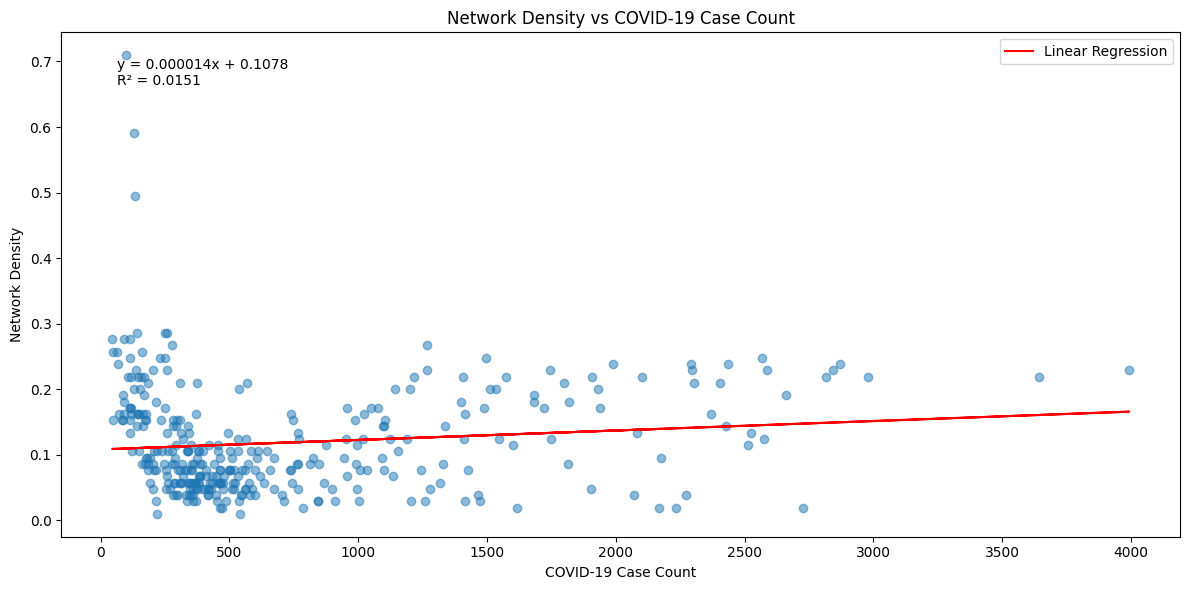

Global Clustering Coefficient vs COVID-19 Case Count:
Slope: 0.000007
Intercept: 0.0613
R-squared: 0.0275
P-value: 0.0023

Network Density vs COVID-19 Case Count:
Slope: 0.000014
Intercept: 0.1078
R-squared: 0.0151
P-value: 0.0244


In [19]:
# Create the plot for density
plt.figure(figsize=(12, 6))
plt.scatter(df_merged['Count'], df_merged['density'], alpha=0.5)
plt.plot(df_merged['Count'], intercept_density + slope_density * df_merged['Count'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Network Density vs COVID-19 Case Count')
plt.xlabel('COVID-19 Case Count')
plt.ylabel('Network Density')
plt.legend()

# Add text with regression details
text_density = f'y = {slope_density:.6f}x + {intercept_density:.4f}\nR² = {r_value_density**2:.4f}'
plt.text(0.05, 0.95, text_density, transform=plt.gca().transAxes, verticalalignment='top')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("../../graphs/density_vs_covid_cases.png", bbox_inches='tight')
plt.savefig("../../graphs/density_vs_covid_cases.pdf", bbox_inches='tight')
plt.show()

# Print additional statistics
print("Global Clustering Coefficient vs COVID-19 Case Count:")
print(f"Slope: {slope_cc:.6f}")
print(f"Intercept: {intercept_cc:.4f}")
print(f"R-squared: {r_value_cc**2:.4f}")
print(f"P-value: {p_value_cc:.4f}")

print("\nNetwork Density vs COVID-19 Case Count:")
print(f"Slope: {slope_density:.6f}")
print(f"Intercept: {intercept_density:.4f}")
print(f"R-squared: {r_value_density**2:.4f}")
print(f"P-value: {p_value_density:.4f}")

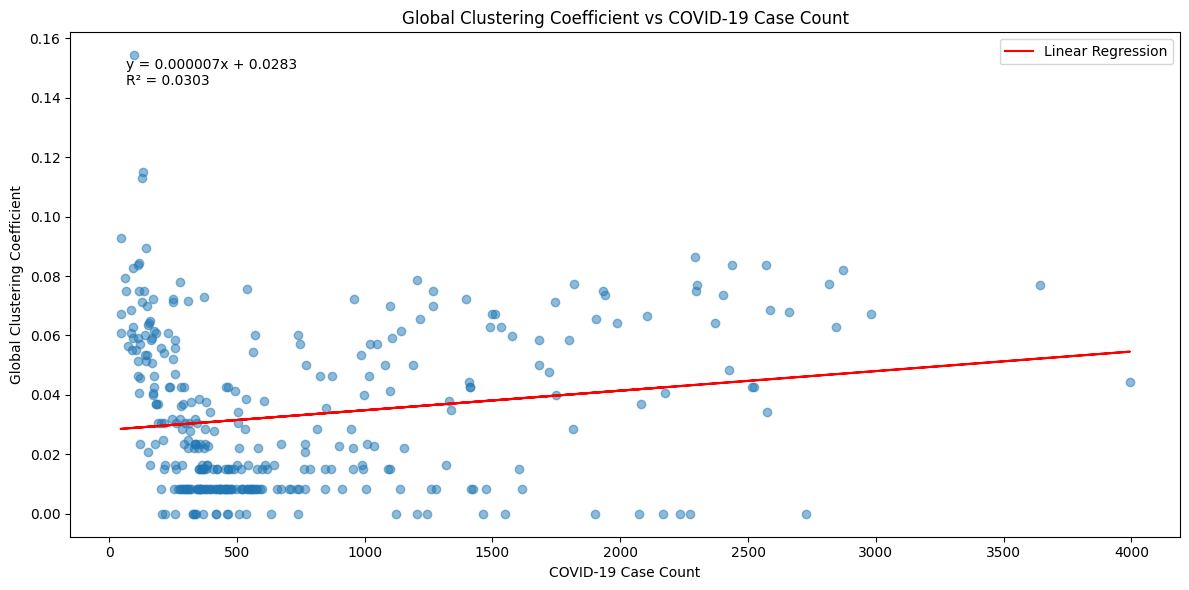


Merged Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       335 non-null    datetime64[ns]
 1   density    335 non-null    float64       
 2   global_cc  335 non-null    float64       
 3   Count      335 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 10.6 KB
None

First few rows of the merged dataframe:
        date   density  global_cc  Count
0 2020-04-16  0.557143   0.154286     98
1 2020-04-17  0.390476   0.113016    130
2 2020-04-18  0.333333   0.114921    132
3 2020-04-19  0.142857   0.083810    113
4 2020-04-20  0.114286   0.071111    129

Total number of rows in merged dataframe: 335
Date range: from 2020-04-16 00:00:00 to 2021-03-16 00:00:00


In [23]:
# Read the CSV file
df_netstats = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.5.csv', parse_dates=['date'])

# Read the COVID data
df_covid = pd.read_pickle('DOH_COVID_Data_NCR_DateCounts_Apr2020_Mar2021.pkl')
df_covid['DateRepConf'] = pd.to_datetime(df_covid['DateRepConf'])

# Rename 'DateRepConf' to 'date' in df_covid
df_covid = df_covid.rename(columns={'DateRepConf': 'date'})

# Merge the datasets
df_merged = pd.merge(df_netstats, df_covid, on='date', how='inner')

# Drop the redundant 'DateRepConf' column if it still exists
if 'DateRepConf' in df_merged.columns:
    df_merged = df_merged.drop('DateRepConf', axis=1)

# Save the merged dataframe to a CSV file

# Perform linear regression for global_cc
slope_cc, intercept_cc, r_value_cc, p_value_cc, std_err_cc = stats.linregress(df_merged['Count'], df_merged['global_cc'])

# Create the plot for global_cc
plt.figure(figsize=(12, 6))
plt.scatter(df_merged['Count'], df_merged['global_cc'], alpha=0.5)
plt.plot(df_merged['Count'], intercept_cc + slope_cc * df_merged['Count'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Global Clustering Coefficient vs COVID-19 Case Count')
plt.xlabel('COVID-19 Case Count')
plt.ylabel('Global Clustering Coefficient')
plt.legend()

# Add text with regression details
text_cc = f'y = {slope_cc:.6f}x + {intercept_cc:.4f}\nR² = {r_value_cc**2:.4f}'
plt.text(0.05, 0.95, text_cc, transform=plt.gca().transAxes, verticalalignment='top')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("../../graphs/global_cc_vs_covid_cases_0.5.png", bbox_inches='tight')
plt.savefig("../../graphs/global_cc_vs_covid_cases_0.5.pdf", bbox_inches='tight')
plt.show()

# Print additional information about the merged dataframe
print("\nMerged Dataframe Information:")
print(df_merged.info())

print("\nFirst few rows of the merged dataframe:")
print(df_merged.head())

print(f"\nTotal number of rows in merged dataframe: {len(df_merged)}")
print(f"Date range: from {df_merged['date'].min()} to {df_merged['date'].max()}")

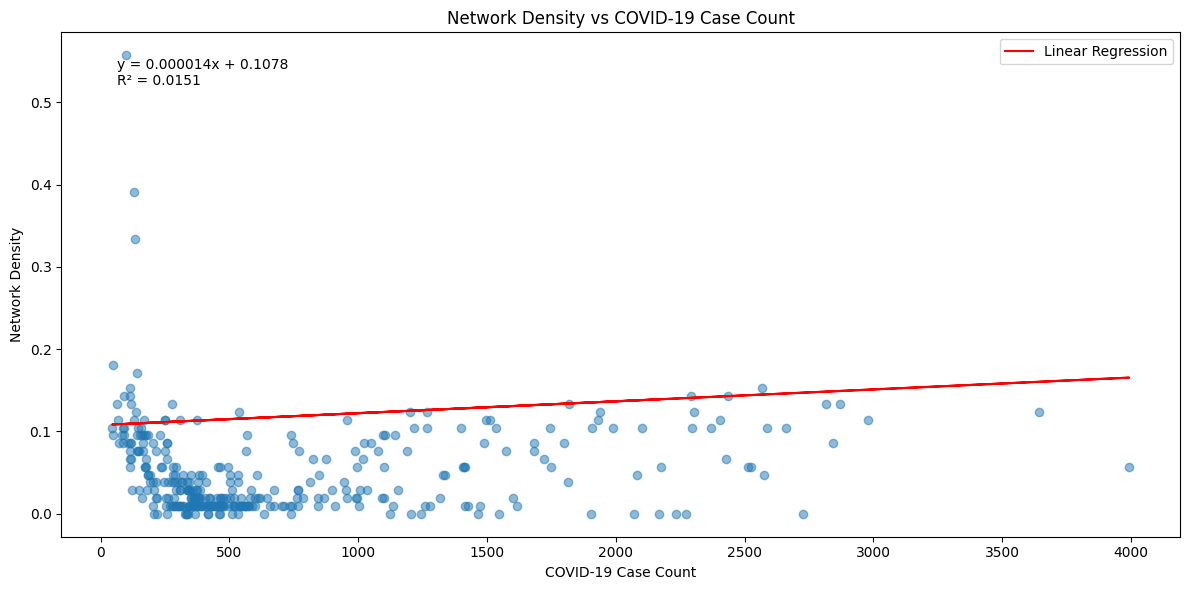

Global Clustering Coefficient vs COVID-19 Case Count:
Slope: 0.000007
Intercept: 0.0283
R-squared: 0.0303
P-value: 0.0014

Network Density vs COVID-19 Case Count:
Slope: 0.000014
Intercept: 0.1078
R-squared: 0.0151
P-value: 0.0244


In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(df_merged['Count'], df_merged['density'], alpha=0.5)
plt.plot(df_merged['Count'], intercept_density + slope_density * df_merged['Count'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Network Density vs COVID-19 Case Count')
plt.xlabel('COVID-19 Case Count')
plt.ylabel('Network Density')
plt.legend()

# Add text with regression details
text_density = f'y = {slope_density:.6f}x + {intercept_density:.4f}\nR² = {r_value_density**2:.4f}'
plt.text(0.05, 0.95, text_density, transform=plt.gca().transAxes, verticalalignment='top')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("../../graphs/density_vs_covid_cases_0.5.png", bbox_inches='tight')
plt.savefig("../../graphs/density_vs_covid_cases_0.5.pdf", bbox_inches='tight')
plt.show()

# Print additional statistics
print("Global Clustering Coefficient vs COVID-19 Case Count:")
print(f"Slope: {slope_cc:.6f}")
print(f"Intercept: {intercept_cc:.4f}")
print(f"R-squared: {r_value_cc**2:.4f}")
print(f"P-value: {p_value_cc:.4f}")

print("\nNetwork Density vs COVID-19 Case Count:")
print(f"Slope: {slope_density:.6f}")
print(f"Intercept: {intercept_density:.4f}")
print(f"R-squared: {r_value_density**2:.4f}")
print(f"P-value: {p_value_density:.4f}")

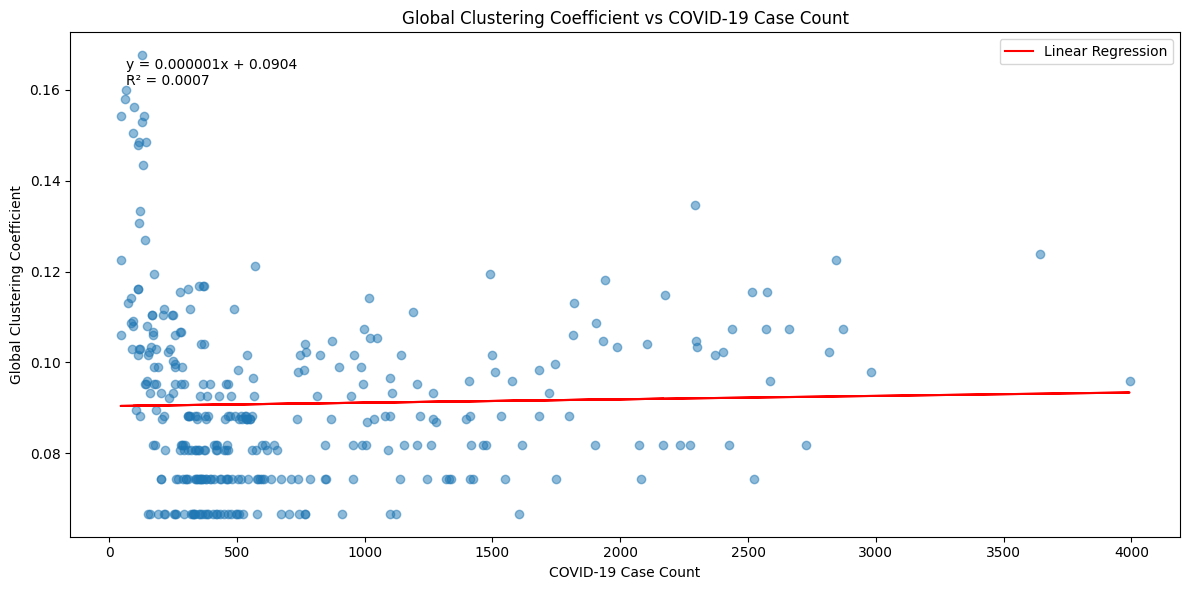


Merged Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       335 non-null    datetime64[ns]
 1   density    335 non-null    float64       
 2   global_cc  335 non-null    float64       
 3   Count      335 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 10.6 KB
None

First few rows of the merged dataframe:
        date   density  global_cc  Count
0 2020-04-16  0.404762   0.156190     98
1 2020-04-17  0.290476   0.153016    130
2 2020-04-18  0.223810   0.143492    132
3 2020-04-19  0.195238   0.147937    113
4 2020-04-20  0.242857   0.167619    129

Total number of rows in merged dataframe: 335
Date range: from 2020-04-16 00:00:00 to 2021-03-16 00:00:00


In [25]:
# Read the CSV file
df_netstats = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.6.csv', parse_dates=['date'])

# Read the COVID data
df_covid = pd.read_pickle('DOH_COVID_Data_NCR_DateCounts_Apr2020_Mar2021.pkl')
df_covid['DateRepConf'] = pd.to_datetime(df_covid['DateRepConf'])

# Rename 'DateRepConf' to 'date' in df_covid
df_covid = df_covid.rename(columns={'DateRepConf': 'date'})

# Merge the datasets
df_merged = pd.merge(df_netstats, df_covid, on='date', how='inner')

# Drop the redundant 'DateRepConf' column if it still exists
if 'DateRepConf' in df_merged.columns:
    df_merged = df_merged.drop('DateRepConf', axis=1)

# Save the merged dataframe to a CSV file

# Perform linear regression for global_cc
slope_cc, intercept_cc, r_value_cc, p_value_cc, std_err_cc = stats.linregress(df_merged['Count'], df_merged['global_cc'])

# Create the plot for global_cc
plt.figure(figsize=(12, 6))
plt.scatter(df_merged['Count'], df_merged['global_cc'], alpha=0.5)
plt.plot(df_merged['Count'], intercept_cc + slope_cc * df_merged['Count'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Global Clustering Coefficient vs COVID-19 Case Count')
plt.xlabel('COVID-19 Case Count')
plt.ylabel('Global Clustering Coefficient')
plt.legend()

# Add text with regression details
text_cc = f'y = {slope_cc:.6f}x + {intercept_cc:.4f}\nR² = {r_value_cc**2:.4f}'
plt.text(0.05, 0.95, text_cc, transform=plt.gca().transAxes, verticalalignment='top')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("../../graphs/global_cc_vs_covid_cases_0.6.png", bbox_inches='tight')
plt.savefig("../../graphs/global_cc_vs_covid_cases_0.6.pdf", bbox_inches='tight')
plt.show()

# Print additional information about the merged dataframe
print("\nMerged Dataframe Information:")
print(df_merged.info())

print("\nFirst few rows of the merged dataframe:")
print(df_merged.head())

print(f"\nTotal number of rows in merged dataframe: {len(df_merged)}")
print(f"Date range: from {df_merged['date'].min()} to {df_merged['date'].max()}")

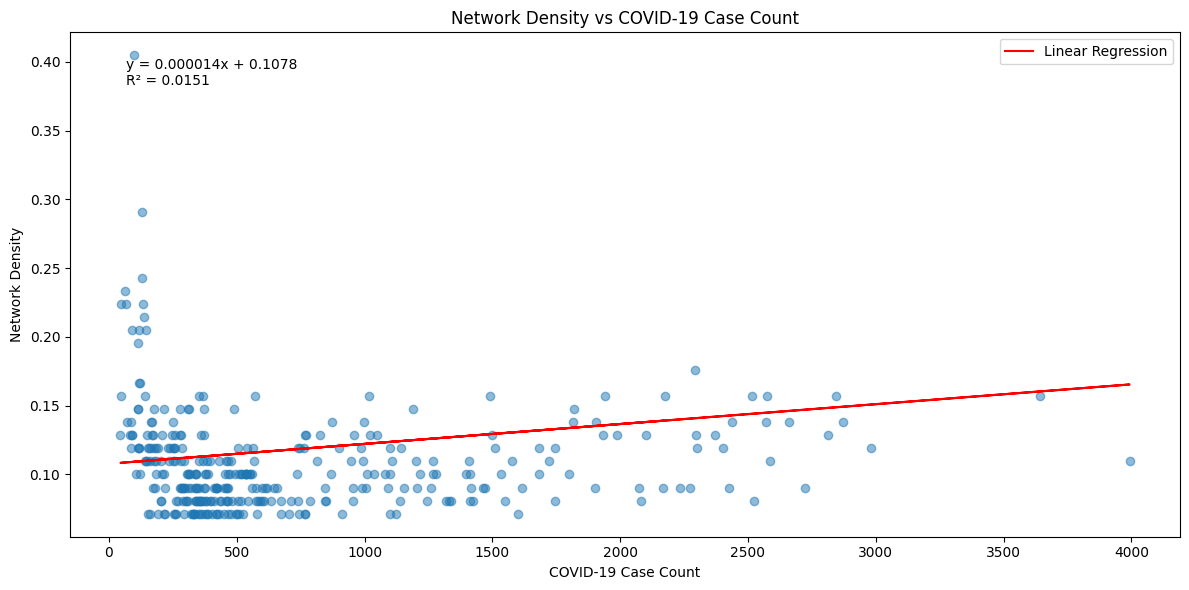

Global Clustering Coefficient vs COVID-19 Case Count:
Slope: 0.000001
Intercept: 0.0904
R-squared: 0.0007
P-value: 0.6223

Network Density vs COVID-19 Case Count:
Slope: 0.000014
Intercept: 0.1078
R-squared: 0.0151
P-value: 0.0244


: 

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(df_merged['Count'], df_merged['density'], alpha=0.5)
plt.plot(df_merged['Count'], intercept_density + slope_density * df_merged['Count'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Network Density vs COVID-19 Case Count')
plt.xlabel('COVID-19 Case Count')
plt.ylabel('Network Density')
plt.legend()

# Add text with regression details
text_density = f'y = {slope_density:.6f}x + {intercept_density:.4f}\nR² = {r_value_density**2:.4f}'
plt.text(0.05, 0.95, text_density, transform=plt.gca().transAxes, verticalalignment='top')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("../../graphs/density_vs_covid_cases_0.6.png", bbox_inches='tight')
plt.savefig("../../graphs/density_vs_covid_cases_0.6.pdf", bbox_inches='tight')
plt.show()

# Print additional statistics
print("Global Clustering Coefficient vs COVID-19 Case Count:")
print(f"Slope: {slope_cc:.6f}")
print(f"Intercept: {intercept_cc:.4f}")
print(f"R-squared: {r_value_cc**2:.4f}")
print(f"P-value: {p_value_cc:.4f}")

print("\nNetwork Density vs COVID-19 Case Count:")
print(f"Slope: {slope_density:.6f}")
print(f"Intercept: {intercept_density:.4f}")
print(f"R-squared: {r_value_density**2:.4f}")
print(f"P-value: {p_value_density:.4f}")